# Lecture 3: Debugging & File Reading
## October 1, 2019
## Tristan Glatard

# Today's objectives
* Create Python scripts
* Read and analyze a data file

# Python scripts

So far we wrote programs exclusively in the Python interpreter. While this is useful to test things out, it is not very convenient when more than a few lines of code need to be written. From now on, we will write our programs in *scripts*. Python scripts:
* Are basic text files (not pdf files, not Word files)
* Are usually saved with extension `.py`
* Are passed directly to the interpreter for execution (no compilation)

# Editors

To write and edit Python scripts, you can use any program that can manipulate text files. Such a program is called an *editor*. The recommended editor in this class is [VSCode](https://code.visualstudio.com/Download) (it should already be installed on your computer). [Popular alternates](https://realpython.com/python-ides-code-editors-guide) are PyCharm, Atom, Spyder and Sublime.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Open VSCode
* Create a file and write a basic Python program in it, for instance `print("Hello")`
* Save the file and run it with Pythton

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Create another program file in VSCode
* Write a longer program, for instance the first `if` example in Lecture 2:

```    
b = "Atlantic"

if b.startswith("Ca") and b != "Cambodia":
    print("it's here!")
    print('something else')    
else:
    print("it's far!")
```
* Run the program and make sure it works correctly

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

Coding in the interpreter or through scripts both have advantages and drawbacks. List one advantage and one drawback of each approach.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

You can now finish the coding exercises seen in Lecture 2, using scripts instead of the interpreter. If you have done all the exercises in Lecture 2 already, pick your favorite one and re-implement it in a script.

# Mini project: Arthritis Inflammation

Now that we acquired the basics of Python programming, it's time to use it to do something useful. In this mini project, adapted from [Software Carpentry](https://swcarpentry.github.io/python-novice-inflammation/) we will analyse our first dataset, related to arthritis inflammation. We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. Our goal is to compute the average number of inflammations for each patient during the time of the clinical trial. 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* [Download](https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip) the data
* Unzip the data file and open inflammation-01.csv

The data is stored in comma-separated values (CSV) format:
* each row holds information for a single patient,
* columns represent successive days.

Each number represents the number of inflammation bouts that a particular patient experienced on a given day. For example, value “6” at row 3 column 7 of the data set above means that the third patient was experiencing inflammation six times on the seventh day of the clinical study.

## Reading data files

Our first task will be to read the data file in Python. To do that, we will have to learn about the `open` function. In its simplest form, `open` opens a text file and returns a file object:

In [8]:
f = open('test.txt')  # f is now an object representing the file, aka a "file object"
for line in f:  # f can be iterated on (but it's not a list!)
    print(line)  # each 'element' in f represents a line in the file

Here is one line

Another line

... and a third line!



In some cases, it may be convenient to read all the lines at once:

In [2]:
f = open('test.txt')
lines = f.readlines()
print(lines)

['Here is one line\n', 'Another line\n', '... and a third line!\n']


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Write a program that counts the number of patients in a file of the arthritis dataset, for instance `inflammation-01.csv`.

In [9]:
f = open('../arthritis/data/inflammation-01.csv')
patient_count = 0
for line in f:
    patient_count += 1
print(patient_count)

60


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Modify your program to count the number of patients across all the files in the dataset. Hint: iterate over `range(1, 10)`.

In [10]:
file_name_template = '../arthritis/data/inflammation-0{}.csv'
patient_count = 0
for i in range(1, 10):
    file_name = file_name_template.format(i)
    f = open(file_name)
    for line in f:
        patient_count += 1
print(patient_count)
        

540


## Parsing data files

To do something useful with our data file, we will have to import it in some kind of data structure, such as a list. This operation is called *parsing*. The simplest way to parse a data file is to iterate through its lines, process them and store them in a list. For instance, this program parses the first character of each line in our example file:

In [3]:
first_chars = []
f = open('test.txt')
for line in f:
    first_chars = first_chars + [line[0]]
print(first_chars)

['H', 'A', '.']


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Create a program that counts the average number of inflammations for each patient in a data file. For instance, when your program is run with `inflammation-01.csv`, it should produce the following output:
```
5.45
5.425
6.1
5.9
5.55
6.225
...
```

Hint: suggested approach:
1. Open the file
2. Go through all the lines with a `for` loop
3. For each line, use `str.split` to split the numbers in a list
4. Compute the average of numbers in the list

In [6]:
f = open('../arthritis/data/inflammation-01.csv')
for line in f:
    numbers = line.split(',')
    s = 0
    count = 0
    for x in numbers:
        s += int(x)
        count += 1
    s /= count
    print(s)

5.45
5.425
6.1
5.9
5.55
6.225
5.975
6.65
6.625
6.525
6.775
5.8
6.225
5.75
5.225
6.3
6.55
5.7
5.85
6.55
5.775
5.825
6.175
6.1
5.8
6.425
6.05
6.025
6.175
6.55
6.175
6.35
6.725
6.125
7.075
5.725
5.925
6.15
6.075
5.75
5.975
5.725
6.3
5.9
6.75
5.925
7.225
6.15
5.95
6.275
5.7
6.1
6.825
5.975
6.725
5.7
6.25
6.4
7.05
5.9


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Modify your program to count the average number of inflammations across all patients in a data file.

In [7]:
f = open('../arthritis/data/inflammation-01.csv')
s = 0
count = 0
for line in f:
    numbers = line.split(',')    
    for x in numbers:
        s += int(x)
        count += 1
s /= count
print(s)

6.14875


# Bonus: data visualization

The `matplotlib` library can be used to plot graphs from Python data structures. For instance, it can be used to plot numbers in a list:


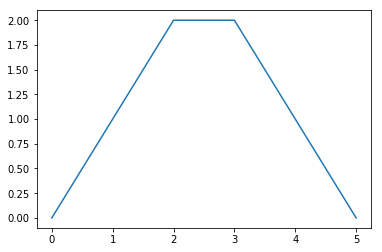

In [2]:
from matplotlib import pyplot as plt
data = [0, 1, 2, 2, 1, 0]
plt.plot(data)
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Create a program that plots the number of inflammations per day for the first patient in `inflammation-01.csv` 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Modify your program to compute and plot the average number of inflammations per day across all patients

# Bonus: loading data with numpy

`numpy` is a useful library to manipulate tables of numbers. It can load a CSV file as follows:

In [6]:
import numpy
a = numpy.loadtxt(fname='../arthritis/data/inflammation-01.csv', delimiter=',')

The resulting array can be accessed as a list of rows:

In [7]:
a[2][6]  # number of inflammations for patient 3 at day 7 (careful, indices start at 0)

6.0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Modify the previous programs so that they use numpy arrays instead of lists